# Subsampling

Subsample training data to reduce computational workload

## Imports

Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import pickle
from sklearn.preprocessing import LabelEncoder

from src.sampler import class_weighter

Import data

In [2]:
with open('data/derived/data_train.pickle', 'rb') as file:
    data_train = pickle.load(file)
with open('data/derived/labels_train.pickle', 'rb') as file:
    labels_train = pickle.load(file)
print('Shape of data_train:', data_train.shape)
print('Length of labels_train:', len(labels_train))

Shape of data_train: (25361, 224, 224, 3)
Length of labels_train: 25361


Convert labels to integers for model training

In [3]:
label_encoder = LabelEncoder()
labels_train_encoded = label_encoder.fit_transform(labels_train)
print('Original labels: {}'.format(labels_train[:10]))
print('Encoded labels: {}'.format(labels_train_encoded[:10]))
print('Label encoder classes: {}'.format(label_encoder.classes_[:10]))

Original labels: ['w_025911c', 'new_whale', 'new_whale', 'new_whale', 'new_whale', 'new_whale', 'w_b1d49c5', 'w_438dd0b', 'new_whale', 'new_whale']
Encoded labels: [  44    0    0    0    0    0 3443 1314    0    0]
Label encoder classes: ['new_whale' 'w_0003639' 'w_0003c59' 'w_0027efa' 'w_00289b1' 'w_002c810'
 'w_0032a46' 'w_003bae6' 'w_00656c0' 'w_0066399']


## Subsample training data and labels

To select all observations in minority classes (class with less than 100 observations), and majority classes (class with more than 100 observations)

In [4]:
# Set of unique clases
classes_unique = np.array(list(set(labels_train_encoded)))
classes_unique[:5]

array([0, 1, 2, 3, 4])

In [5]:
# Obtain counts for each class
class_counts = np.array([len(labels_train_encoded[labels_train_encoded == label]) for label in classes_unique])
class_counts[:5]

array([9664,    1,    1,   10,    2])

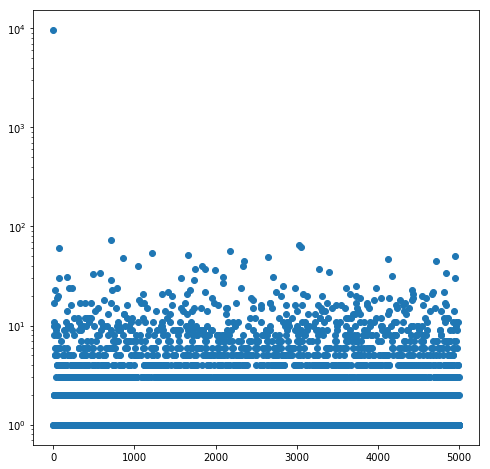

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(classes_unique, class_counts)
plt.xlabel('')
plt.yscale('log')
plt.show()

In [7]:
# Obtain labels with counts of 100 or less
minority_classes = classes_unique[class_counts <= 100]
minority_classes.shape

(5004,)

In [8]:
# Obtain labels with counts of above 100
majority_classes = classes_unique[class_counts > 100]
majority_classes

array([0])

In [9]:
# Get indices of minority class observations in training set
index_array = np.arange(len(labels_train_encoded))
minority_indices = index_array[np.isin(labels_train_encoded, minority_classes)]
minority_indices.shape

(15697,)

In [10]:
# Get indices of majority class observations in training set
majority_indices = index_array[np.isin(labels_train_encoded, majority_classes)]
majority_indices.shape

(9664,)

In [11]:
# Subsample observations in middle and majority classes, and combine with minority classes observations
np.random.seed(1)
sample_index = np.concatenate([minority_indices,
                              np.random.choice(majority_indices, 50, replace=False)])
sample_index.shape

(15747,)

In [12]:
# Obtain and save data_train_sample and labels_train_sample
data_train_sample = data_train[sample_index]
labels_train_sample = np.array(labels_train)[sample_index]
with open('data/derived/data_train_sample.pickle', 'wb') as file:
    pickle.dump(data_train_sample, file)
with open('data/derived/labels_train_sample.pickle', 'wb') as file:
    pickle.dump(labels_train_sample, file)
print('Shape of data_train_sample:', data_train_sample.shape)
print('Length of labels_train_sample', len(labels_train_sample))

Shape of data_train_sample: (15747, 224, 224, 3)
Length of labels_train_sample 15747
